In [1]:
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt

import bayes_opt.visualization.visualization_utility_cost as viz
from bayes_opt.test_functions import drl_experiments
from bayes_opt.utility.basic_utility_functions import evaluating_final_util_MaxEpoch,set_seed
from bayes_opt.sequentialBO.boil import BOIL
from bayes_opt.curve_compression import return_logistic_curve

from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore")


W1120 09:55:02.629916  7088 deprecation.py:323] From C:\Users\Vu\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\compat\v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


# Specifying the search space

In [2]:
SearchSpace = OrderedDict([('gamma',(0.8,1)), ('alpha', (1e-6,1e-2)), ('maxEpisodes',(200, 500))])


varParams = list(SearchSpace.keys())

# These are the fixed hyperparamters for Dueling DQN

In [3]:
fixedParams = OrderedDict([
        ("DDQN", True),
        ("Duelling", True),
        ("buffer_size", 5000),
        ("batch_sz", 64),
        ("maxSteps", 200),
        ("PER", 0),
        ("alpha", 1.0),
        ("update_rate", 1),
        ("architecture", [50,50]),
        ("maxExp", 10000),
        ("eps_0", 1.0),
        ("eps_final", 0.05),
        ("beta_time", 1000),
        ("beta_0", 0.6),
        ("beta_final", 1.0)])


# Initializing the DDQN on CartPole-v0 environment

In [4]:
myfunction=drl_experiments.DRL_experiment("DQN", "CartPole-v0", varParams, fixedParams, SearchSpace)


# Initializing BOIL class

In [5]:
acq_name='ei_mu_max'

func_params={}
func_params['function']=myfunction

boil=BOIL(myfunction.func,myfunction.bounds,acq_name=acq_name,verbose=1)

# Initializing BOIL with 3*[no_of_hyperparameter] points

In [6]:
n_init_points=3*myfunction.input_dim
print("initialization {} points - please wait...".format(n_init_points))
boil.init(n_init_points)

initialization 9 points - please wait...
Max #augmented points 10 	 #augmented points  8 	 Augmented points:  [0.    0.106 0.245 0.365 0.5   0.654 0.783 0.905]
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []


# Running BOIL over multiple iterations

In [7]:
NN=10*myfunction.input_dim
print("Running BOIL for {} iterations".format(NN))
strFolderOut="run_experiments\plot"

for index in tqdm(range(0,NN)):
    boil.suggest_nextpoint()


Running BOIL for 30 iterations


  0%|                                                                                           | 0/30 [00:00<?, ?it/s]

ln of conditioning number of GP covariance matrix 9.2
selected point from acq func: [0.9098 0.9144 0.3778] acq val=log(Utility/Cost)= -0.4069
Max #augmented points 3 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.982  0.0091] t=313 current y=18.51, ybest=133.64


  3%|██▋                                                                             | 1/30 [03:06<1:30:06, 186.43s/it]

ln of conditioning number of GP covariance matrix 9.2
==estimated lengthscale_x=0.1573   lengthscale_t=0.528   Logistic_m0=1.8   Logistic_g0=0.9
selected point from acq func: [0.3374 0.0072 0.015 ] acq val=log(Utility/Cost)= -0.4384
[original scale] x=[0.8675 0.0001] t=205 current y=4.40, ybest=133.64


  7%|█████▎                                                                          | 2/30 [07:09<1:34:52, 203.30s/it]

ln of conditioning number of GP covariance matrix 9.6
selected point from acq func: [1. 0. 0.] acq val=log(Utility/Cost)= -1.2676
[original scale] x=[1. 0.] t=200 current y=0.45, ybest=133.64


 10%|████████                                                                        | 3/30 [08:12<1:12:35, 161.32s/it]

ln of conditioning number of GP covariance matrix 9.6
selected point from acq func: [0.6873 0.651  1.    ] acq val=log(Utility/Cost)= -1.6504
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9375 0.0065] t=500 current y=102.43, ybest=133.64


 13%|██████████▋                                                                     | 4/30 [23:14<2:46:13, 383.58s/it]

ln of conditioning number of GP covariance matrix 9.6
selected point from acq func: [0.0115 0.4993 1.    ] acq val=log(Utility/Cost)= -1.9528
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8023 0.005 ] t=500 current y=111.38, ybest=133.64


 17%|█████████████▎                                                                  | 5/30 [41:38<4:09:49, 599.59s/it]

ln of conditioning number of GP covariance matrix 9.6
selected point from acq func: [0.507 1.    1.   ] acq val=log(Utility/Cost)= -1.8441
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9014 0.01  ] t=500 current y=93.26, ybest=133.64


 20%|████████████████                                                                | 6/30 [58:05<4:46:18, 715.79s/it]

ln of conditioning number of GP covariance matrix 9.7
selected point from acq func: [0.2443 0.6069 1.    ] acq val=log(Utility/Cost)= -2.3227
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8489 0.0061] t=500 current y=98.82, ybest=133.64


 23%|██████████████████▏                                                           | 7/30 [1:15:14<5:10:24, 809.75s/it]

ln of conditioning number of GP covariance matrix 9.7
==estimated lengthscale_x=0.1416   lengthscale_t=0.600   Logistic_m0=2.4   Logistic_g0=0.9
selected point from acq func: [0.0943 0.388  0.3316] acq val=log(Utility/Cost)= -1.3436
Max #augmented points 3 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8189 0.0039] t=299 current y=16.31, ybest=133.64


 27%|████████████████████▊                                                         | 8/30 [1:24:48<4:30:59, 739.05s/it]

ln of conditioning number of GP covariance matrix 9.7
selected point from acq func: [0. 1. 0.] acq val=log(Utility/Cost)= -2.5984
[original scale] x=[0.8  0.01] t=200 current y=2.66, ybest=133.64


 30%|███████████████████████▍                                                      | 9/30 [1:29:18<3:29:23, 598.28s/it]

ln of conditioning number of GP covariance matrix 9.7
selected point from acq func: [0.6002 0.2177 1.    ] acq val=log(Utility/Cost)= -2.8805
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.92   0.0022] t=500 current y=117.25, ybest=133.64


 33%|█████████████████████████▋                                                   | 10/30 [1:45:56<3:59:27, 718.38s/it]

ln of conditioning number of GP covariance matrix 9.7
selected point from acq func: [1. 1. 1.] acq val=log(Utility/Cost)= -2.7876
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[1.   0.01] t=500 current y=10.66, ybest=133.64


 37%|████████████████████████████▏                                                | 11/30 [1:50:20<3:04:16, 581.90s/it]

ln of conditioning number of GP covariance matrix 9.7
selected point from acq func: [0.7613 0.4048 0.0739] acq val=log(Utility/Cost)= -2.7635
[original scale] x=[0.9523 0.004 ] t=222 current y=1.13, ybest=133.64


 40%|██████████████████████████████▊                                              | 12/30 [1:51:56<2:10:54, 436.34s/it]

ln of conditioning number of GP covariance matrix 9.7
selected point from acq func: [0.    0.315 1.   ] acq val=log(Utility/Cost)= -2.8802
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8    0.0032] t=500 current y=85.50, ybest=133.64


 43%|█████████████████████████████████▎                                           | 13/30 [2:08:50<2:52:40, 609.42s/it]

ln of conditioning number of GP covariance matrix 9.8
==estimated lengthscale_x=0.0951   lengthscale_t=0.600   Logistic_m0=-0.3   Logistic_g0=0.9
selected point from acq func: [0.     0.6374 0.4699] acq val=log(Utility/Cost)= -1.7482
Max #augmented points 4 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8    0.0064] t=341 current y=73.96, ybest=133.64


 47%|███████████████████████████████████▉                                         | 14/30 [2:19:03<2:42:50, 610.67s/it]

ln of conditioning number of GP covariance matrix 9.6
selected point from acq func: [0.7049 0.8723 1.    ] acq val=log(Utility/Cost)= -2.3979
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.941  0.0087] t=500 current y=115.99, ybest=133.64


 50%|██████████████████████████████████████▌                                      | 15/30 [2:32:50<2:48:53, 675.56s/it]

ln of conditioning number of GP covariance matrix 9.7
selected point from acq func: [0.     0.7582 1.    ] acq val=log(Utility/Cost)= -2.9447
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8    0.0076] t=500 current y=110.13, ybest=133.64


 53%|█████████████████████████████████████████                                    | 16/30 [2:49:33<3:00:30, 773.62s/it]

ln of conditioning number of GP covariance matrix 9.7
selected point from acq func: [0.2426 0.2755 1.    ] acq val=log(Utility/Cost)= -3.1265
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8485 0.0028] t=500 current y=135.33, ybest=135.33


 57%|███████████████████████████████████████████▋                                 | 17/30 [3:08:00<3:09:18, 873.73s/it]

ln of conditioning number of GP covariance matrix 9.7
selected point from acq func: [0.9644 0.688  0.9767] acq val=log(Utility/Cost)= -3.1521
Max #augmented points 9 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9929 0.0069] t=493 current y=83.74, ybest=135.33


 60%|██████████████████████████████████████████████▏                              | 18/30 [3:19:44<2:44:34, 822.86s/it]

ln of conditioning number of GP covariance matrix 9.7
selected point from acq func: [0.368  0.8534 1.    ] acq val=log(Utility/Cost)= -3.3247
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8736 0.0085] t=500 current y=125.45, ybest=135.33


 63%|████████████████████████████████████████████████▊                            | 19/30 [3:35:07<2:36:22, 852.97s/it]

ln of conditioning number of GP covariance matrix 9.7
==estimated lengthscale_x=0.1021   lengthscale_t=0.600   Logistic_m0=-0.6   Logistic_g0=0.8
selected point from acq func: [0.3519 1.     0.4582] acq val=log(Utility/Cost)= -2.0243
Max #augmented points 4 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8704 0.01  ] t=337 current y=77.32, ybest=135.33


 67%|███████████████████████████████████████████████████▎                         | 20/30 [3:43:45<2:05:24, 752.46s/it]

ln of conditioning number of GP covariance matrix 9.8
selected point from acq func: [0. 1. 1.] acq val=log(Utility/Cost)= -3.8121
Max #augmented points 10 	 #augmented points  4 	 Augmented points:  [0.    0.229 0.5   0.795]
[original scale] x=[0.8  0.01] t=439 current y=109.32, ybest=135.33


 70%|█████████████████████████████████████████████████████▉                       | 21/30 [3:59:41<2:02:00, 813.39s/it]

ln of conditioning number of GP covariance matrix 9.8
==estimated lengthscale_x=0.0969   lengthscale_t=0.518   Logistic_m0=-0.1   Logistic_g0=1.0
selected point from acq func: [0.     0.1858 0.    ] acq val=log(Utility/Cost)= -1.8944
[original scale] x=[0.8    0.0019] t=200 current y=13.94, ybest=135.33


 73%|████████████████████████████████████████████████████████▍                    | 22/30 [4:04:00<1:26:16, 647.07s/it]

ln of conditioning number of GP covariance matrix 9.7
selected point from acq func: [0.085 0.    1.   ] acq val=log(Utility/Cost)= -3.8164
Max #augmented points 10 	 #augmented points  6 	 Augmented points:  [0.    0.16  0.372 0.532 0.721 0.859]
[original scale] x=[0.817 0.   ] t=458 current y=123.01, ybest=135.33


 77%|███████████████████████████████████████████████████████████                  | 23/30 [4:26:44<1:40:36, 862.34s/it]

ln of conditioning number of GP covariance matrix 9.7
selected point from acq func: [0. 0. 1.] acq val=log(Utility/Cost)= -3.6444
Max #augmented points 10 	 #augmented points  5 	 Augmented points:  [0.    0.24  0.448 0.666 0.841]
[original scale] x=[0.8 0. ] t=452 current y=123.74, ybest=135.82


 80%|████████████████████████████████████████████████████████████▊               | 24/30 [4:51:02<1:44:05, 1040.97s/it]

ln of conditioning number of GP covariance matrix 9.9
selected point from acq func: [0.5879 0.331  0.7633] acq val=log(Utility/Cost)= -4.0192
Max #augmented points 7 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9176 0.0033] t=429 current y=115.04, ybest=135.82


 83%|████████████████████████████████████████████████████████████████▏            | 25/30 [5:05:24<1:22:15, 987.12s/it]

ln of conditioning number of GP covariance matrix 9.9
selected point from acq func: [0.6228 1.     0.    ] acq val=log(Utility/Cost)= -4.035
[original scale] x=[0.9246 0.01  ] t=200 current y=13.64, ybest=135.82


 87%|████████████████████████████████████████████████████████████████████▍          | 26/30 [5:09:21<50:48, 762.13s/it]

ln of conditioning number of GP covariance matrix 9.9
selected point from acq func: [0.2075 1.     1.    ] acq val=log(Utility/Cost)= -3.3646
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8415 0.01  ] t=500 current y=118.38, ybest=135.82


 90%|███████████████████████████████████████████████████████████████████████        | 27/30 [5:25:16<40:59, 819.91s/it]

ln of conditioning number of GP covariance matrix 9.9
selected point from acq func: [0.7413 0.     1.    ] acq val=log(Utility/Cost)= -4.1979
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9483 0.    ] t=500 current y=129.77, ybest=135.82


 93%|█████████████████████████████████████████████████████████████████████████▋     | 28/30 [5:41:13<28:42, 861.31s/it]

ln of conditioning number of GP covariance matrix 9.9
==estimated lengthscale_x=0.1114   lengthscale_t=0.584   Logistic_m0=-0.1   Logistic_g0=1.0
selected point from acq func: [0.3138 0.3294 0.5518] acq val=log(Utility/Cost)= -1.3049
Max #augmented points 5 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8628 0.0033] t=366 current y=86.51, ybest=135.82


 97%|████████████████████████████████████████████████████████████████████████████▎  | 29/30 [5:51:58<13:16, 796.23s/it]

ln of conditioning number of GP covariance matrix 10.0
selected point from acq func: [0.6914 0.     0.737 ] acq val=log(Utility/Cost)= -3.6127
Max #augmented points 7 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9383 0.    ] t=421 current y=108.39, ybest=135.82


100%|███████████████████████████████████████████████████████████████████████████████| 30/30 [6:04:47<00:00, 788.02s/it]


# We evaluate the final performance score util MaxEpoch. The final utility score is marginalizing with different choices for the Logisic curve.

100%|██████████████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<?, ?it/s]


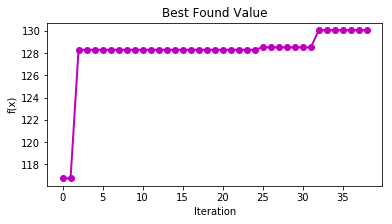

In [8]:
boil.Y_original=evaluating_final_util_MaxEpoch(boil)
viz.show_optimization_progress(boil)

# Plot the training curve of the best found hyperparameter

Best found hyperparameter = [0.8        0.00758193]


Text(0.5, 1.0, 'Training curve of best found hyperparameter')

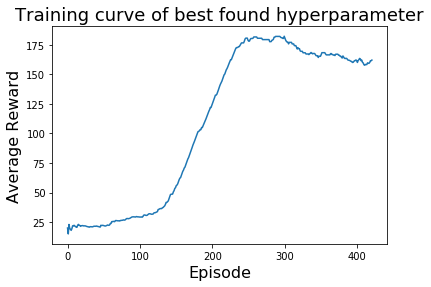

In [9]:
# select the optimal hyperparameter
idxMax=np.argmax(boil.Y_original)
print("Best found hyperparameter =",boil.X_original[idxMax])

# play the best parameter to Max Iteration
T_max=boil.SearchSpace[-1,1]

curve,time=myfunction.func([boil.X_original[idxMax,:-1],T_max])
curve=curve[0]
average100_curve=[np.mean( curve[max(0,n-100):n+1] )     for n in range(len(curve)) ]

# plot the found curve
fig=plt.figure()
plt.plot(average100_curve)
plt.xlabel('Episode',fontsize=16)
plt.ylabel('Average Reward',fontsize=16)
plt.title("Training curve of best found hyperparameter",fontsize=18)


# Play the CartPole environment using the best found hyperparameter

In [10]:
myfunction.evaluate(boil.X_original[idxMax], display=True)

array([0.8       , 0.00758193])

# Plot the Conditioning number of the GP covariance matrix

Text(0, 0.5, 'Log of Cond Number of Cov Matrix')

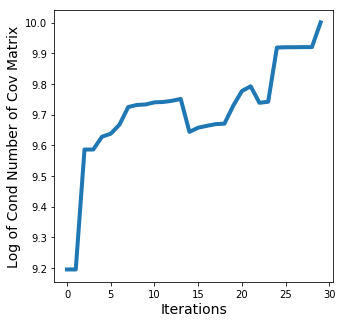

In [11]:
fig=plt.figure(figsize=(5,5))
plt.plot(np.log(boil.condition_number),linewidth=4)
plt.xlabel('Iterations',fontsize=14)
plt.ylabel('Log of Cond Number of Cov Matrix',fontsize=14)

# Plot the estimated preference function

Text(0.5, 1.0, 'Estimated Logistic Curve $m_0$=-0.1 $g_0$=1.0')

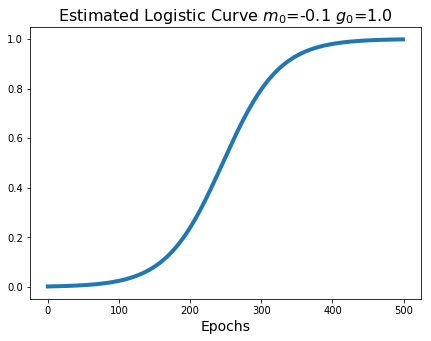

In [12]:
estimated_curve=return_logistic_curve(midpoint=boil.gp.logistic_hyper['midpoint'], 
                                      growth=boil.gp.logistic_hyper['growth'],
                                      MaxEpoch=SearchSpace['maxEpisodes'][1])

fig=plt.figure(figsize=(7,5))
plt.plot(estimated_curve,linewidth=4)
plt.xlabel('Epochs',fontsize=14)
plt.xlabel('Epochs',fontsize=14)

strTitle="Estimated Logistic Curve $m_0$={:.1f} $g_0$={:.1f}".format(boil.gp.logistic_hyper['midpoint'],boil.gp.logistic_hyper['growth'])
plt.title(strTitle,fontsize=16)